In [1]:
import gffutils
import pybedtools
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
db = gffutils.FeatureDB('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.gtf.db')

/Users/bergeric/miniconda3/lib/python3.5/site-packages/gffutils/interface.py:161: UserWarning: It appears that this database has not had the ANALYZE sqlite3 command run on it. Doing so can dramatically speed up queries, and is done by default for databases created with gffutils >0.8.7.1 (this database was created with version 0.8.7.1) Consider calling the analyze() method of this object.
  "method of this object." % self.version)


In [3]:
for a in db.featuretypes():
    print(a)

3UTR
5UTR
CDS
exon
gene
mRNA
miRNA
ncRNA
pre_miRNA
pseudogene
rRNA
snRNA
snoRNA
start_codon
stop_codon
tRNA
transcript


In [4]:
for y in db.features_of_type('gene'):
    print(y)
    break

chrX	FlyBase	gene	19961297	19969323	.	+	.	gene_id "FBgn0031081"; gene_symbol "Nep3";


In [5]:
#number of transcripts per gene
table1 = []
for gene in db.features_of_type('gene'): 
    name = gene.id
    transcript = db.children(gene, featuretype='transcript')
    transcriptnum = len(list(transcript))
    row = [name, transcriptnum]
    table1.append(row)
    

In [6]:
df1 = pd.DataFrame(table1, columns=['gene','#transcripts'])
df1.head()

,gene,#transcripts
0,FBgn0031081,3
1,FBgn0052826,1
2,FBgn0031085,1
3,FBgn0062565,1
4,FBgn0031088,2


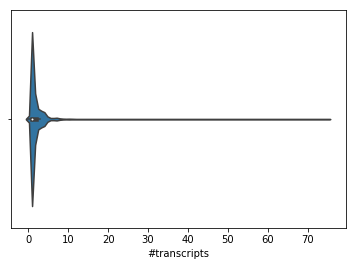

In [7]:
sb.violinplot(df1['#transcripts'])

In [8]:
newdf = df1.describe()

In [9]:
introns = list(db.create_introns(exon_featuretype='exon',grandparent_featuretype=None,parent_featuretype='transcript'))
for a in db.featuretypes():
    print(a)

3UTR
5UTR
CDS
exon
gene
mRNA
miRNA
ncRNA
pre_miRNA
pseudogene
rRNA
snRNA
snoRNA
start_codon
stop_codon
tRNA
transcript


In [10]:
for x in db.features_of_type('mRNA'):
    print(x)
    break

chrX	FlyBase	mRNA	19961689	19968479	15	+	.	transcript_symbol "Nep3-RA"; transcript_id "FBtr0070000"; gene_id "FBgn0031081"; gene_symbol "Nep3";


In [11]:
for x in db.features_of_type('transcript'): 
    if x.id=='FBtr0070000':
        print(x)

chrX	gffutils_derived	transcript	19961689	19968479	.	+	.	transcript_id "FBtr0070000"; gene_id "FBgn0031081";


In [12]:
x.id

'FBtr0301831'

In [94]:
# Get list of transcript IDs from mRNA
tsIds = []
for ts in list(db.features_of_type('mRNA')):
    tsIds.append(ts.attributes['transcript_id'][0])

In [98]:
# make list of ts that are mRNA
tss = []
for ts in db.features_of_type('transcript'):
    if ts.id in tsIds:
        tss.append(ts)
        

In [99]:
#updated to include only mRNA transcripts
table = []
for trns in tss:
    name = trns.id
    exons = list(db.children(trns, featuretype='exon'))
    # length of 1st exon for each transcript
    firstex = exons[0]
    exlen = firstex.end - firstex.start
    # number of introns/exons
    numex = len(exons)
    numin = (numex - 1)
    stuff = [name, exlen, numex, numin]
    table.append(stuff) 

In [100]:
df = pd.DataFrame(table, columns=['transcript','1st_ex_len','#ex','#int'])
df.head()

,transcript,1st_ex_len,#ex,#int
0,FBtr0071763,240,10,9
1,FBtr0071764,818,9,8
2,FBtr0100521,58,10,9
3,FBtr0342981,58,9,8
4,FBtr0083387,831,7,6


In [101]:
tlist = df['transcript']

In [102]:
# length of coding sequence 
table2 = []
cdslen = 0
for x in tlist:
    if list(db.children(x, featuretype='CDS')): 
        for i in db.children(x, featuretype='CDS'):
            len1 = (len(i) - 1 )
            cdslen += len1
    else:     
        cdslen = 0
    
    newline = [x, cdslen]
    table2.append(newline)

In [103]:
# length of utrs using transcript
table3 = []
utrlen = 0
for x in tlist: 
    if list(db.children(x, featuretype='3UTR')):
        for utr in db.children(x, featuretype='3UTR'):
            len2 = len(utr) - 1 
            utrlen += len2
    else:
        utrlen = 0
    newline = [x, utrlen]
    table3.append(newline)

In [104]:
table4 = []
utrlen = 0
for x in tlist: 
    if list(db.children(x, featuretype='5UTR')):
        for utr in db.children(x, featuretype='5UTR'):
            len2 = len(utr) - 1 
            utrlen += len2
    else:
        utrlen = 0
    newline = [x, utrlen]
    table4.append(newline)

In [42]:
print(len(list(db.features_of_type('transcript'))))
print(len(list(db.features_of_type('mRNA'))))

34482
30431


In [44]:
print(len(list(db.features_of_type('miRNA'))))
print(len(list(db.features_of_type('ncRNA'))))
print(len(list(db.features_of_type('tRNA'))))

340
2914
313


In [105]:
utr3frame = pd.DataFrame(table3, columns=['transcript','3UTR_len'])
utr5frame = pd.DataFrame(table4, columns=['transcript','5UTR_len'])
utr3frame.head()

,transcript,3UTR_len
0,FBtr0071763,306
1,FBtr0071764,612
2,FBtr0100521,918
3,FBtr0342981,1224
4,FBtr0083387,3283


In [107]:
df3 = pd.DataFrame(table2, columns=['transcript','cds_len'])
df3.head()

,transcript,cds_len
0,FBtr0071763,3980
1,FBtr0071764,7960
2,FBtr0100521,11940
3,FBtr0342981,15194
4,FBtr0083387,16179


In [108]:
df3['cds_len'].sort_values()

0            3980
1            7960
2           11940
3           15194
4           16179
5           17944
6           18929
7           19914
8           20720
9           21526
10          22332
11          23806
12          24612
13          25466
14          26320
15          27794
16          28600
17          29406
18          34258
19          39163
20          44270
21          49081
22          53839
23          58999
24          63555
25          68058
26          73047
27          77899
28          79514
29          80116
           ...   
30401    60060102
30402    60063128
30403    60066847
30404    60070566
30405    60072095
30406    60073352
30407    60074764
30408    60076224
30409    60077705
30410    60079234
30411    60080090
30412    60080946
30413    60081488
30414    60081833
30415    60082178
30416    60083022
30417    60084418
30418    60085814
30419    60087816
30420    60089818
30421    60091886
30422    60093282
30423    60094320
30424    60098372
30425    6

In [109]:
bigdf = df.merge(df3, how='left', on='transcript').merge(utr3frame, how='left', on='transcript').merge(utr5frame,how='left', on='transcript')
bigdf.head()

,transcript,1st_ex_len,#ex,#int,cds_len,3UTR_len,5UTR_len
0,FBtr0071763,240,10,9,3980,306,546
1,FBtr0071764,818,9,8,7960,612,1419
2,FBtr0100521,58,10,9,11940,918,1783
3,FBtr0342981,58,9,8,15194,1224,2106
4,FBtr0083387,831,7,6,16179,3283,3508


In [112]:
pd.concat([bigdf.describe(), newdf], axis=1).T

,count,mean,std,min,25%,50%,75%,max
1st_ex_len,30431.0,4.368969e+02,5.232505e+02,1.0,139.0,261.0,533.0,10442.0
#ex,30431.0,5.934902e+00,5.171575e+00,1.0,3.0,4.0,8.0,82.0
#int,30431.0,4.934902e+00,5.171575e+00,0.0,2.0,3.0,7.0,81.0
cds_len,30431.0,2.903989e+07,1.600974e+07,3980.0,16561058.5,28938266.0,40883122.5,60119869.0
3UTR_len,30431.0,1.636768e+05,2.822489e+05,0.0,14612.5,47835.0,166768.0,1540262.0
5UTR_len,30431.0,4.563528e+04,6.962685e+04,0.0,6208.5,18809.0,50997.0,413379.0
#transcripts,17728.0,1.945059e+00,2.035513e+00,0.0,1.0,1.0,2.0,75.0
